Data PT Ultrajaya Milk Industry & Trading Company Tbk (ULTJ.JK) yang diberikan adalah data harga saham yang ditampilkan dalam format Jakarta Delayed Price dan dalam mata uang Rupiah (IDR). Informasi ini adalah data yang berasal dari platform atau sumber yang memberikan data pasar keuangan secara real-time atau dengan penundaan tertentu.

Tipe data yang diberikan adalah data harga saham PT Ultrajaya Milk Industry & Trading Company Tbk di Bursa Efek Indonesia (BEI). Biasanya, data harga saham terdiri dari beberapa kolom seperti tanggal perdagangan (Date), harga pembukaan (Open), harga penutupan (Close), harga tertinggi (High), harga terendah (Low), volume perdagangan (Volume), dan mungkin ada kolom tambahan terkait indikator atau informasi lainnya.

Data ini memberikan informasi tentang pergerakan harga saham PT Ultrajaya Milk Industry & Trading Company Tbk di pasar saham Jakarta. Data tersebut menggambarkan harga saham pada waktu tertentu, dan seringkali berisi historis harga saham yang dapat digunakan untuk analisis teknis, evaluasi kinerja saham, dan pengambilan keputusan investasi.

In [72]:
import pandas as pd

df = pd.read_csv('ULTJ.JK.csv', usecols=['Date', 'Open'])

# Mengatur opsi tampilan Pandas untuk mencetak semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mencetak DataFrame
print(df)


           Date    Open
0    2022-06-15  1470.0
1    2022-06-16  1460.0
2    2022-06-17  1450.0
3    2022-06-20  1475.0
4    2022-06-21  1455.0
5    2022-06-22  1455.0
6    2022-06-23  1460.0
7    2022-06-24  1460.0
8    2022-06-27  1465.0
9    2022-06-28  1460.0
10   2022-06-29  1450.0
11   2022-06-30  1455.0
12   2022-07-01  1445.0
13   2022-07-04  1450.0
14   2022-07-05  1430.0
15   2022-07-06  1435.0
16   2022-07-07  1445.0
17   2022-07-08  1440.0
18   2022-07-11  1440.0
19   2022-07-12  1450.0
20   2022-07-13  1450.0
21   2022-07-14  1445.0
22   2022-07-15  1440.0
23   2022-07-18  1400.0
24   2022-07-19  1430.0
25   2022-07-20  1435.0
26   2022-07-21  1455.0
27   2022-07-22  1450.0
28   2022-07-25  1445.0
29   2022-07-26  1460.0
30   2022-07-27  1450.0
31   2022-07-28  1470.0
32   2022-07-29  1460.0
33   2022-08-01  1455.0
34   2022-08-02  1460.0
35   2022-08-03  1465.0
36   2022-08-04  1490.0
37   2022-08-05  1475.0
38   2022-08-08  1505.0
39   2022-08-09  1490.0
40   2022-08-10 

In [73]:
data = df['Open']
n = len(data)
sizeTrain = (round(n*0.8))
data_train = pd.DataFrame(data[:sizeTrain])
data_test = pd.DataFrame(data[sizeTrain:])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(data_train)

# Mengaplikasikan MinMaxScaler pada data pengujian
test_scaled = scaler.transform(data_test)
# joblib.dump(scaler, 'modelScaler.pkl')

train = pd.DataFrame(train_scaled, columns = ['data'])
train = train['data']

test = pd.DataFrame(test_scaled, columns = ['data'])
test = test['data']
test

0     0.512821
1     0.666667
2     0.615385
3     0.666667
4     0.615385
5     0.564103
6     0.333333
7     0.230769
8     0.128205
9     0.153846
10    0.205128
11    0.230769
12    0.179487
13    0.205128
14    0.256410
15    0.256410
16    0.230769
17    0.282051
18    0.282051
19    0.282051
20    0.461538
21    0.589744
22    0.641026
23    0.692308
24    0.641026
25    0.666667
26    0.717949
27    0.641026
28    0.641026
29    0.589744
30    0.666667
31    0.692308
32    0.717949
33    1.102564
34    1.641026
35    1.461538
36    1.410256
37    1.282051
38    1.230769
39    1.205128
40    1.307692
41    1.179487
42    1.076923
43    1.128205
44    1.307692
45    1.743590
46    1.769231
47    2.025641
48    2.128205
49    2.102564
Name: data, dtype: float64

In [74]:
import numpy as np
from numpy import array

def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)

  return array(X), array(y)

df_X, df_Y = split_sequence(train, 2)
x = pd.DataFrame(df_X)
y = pd.DataFrame(df_Y)
dataset_train = pd.concat([x, y], axis=1)

X_train = dataset_train.iloc[:, :2].values
Y_train = dataset_train.iloc[:, -1].values
test_x, test_y = split_sequence(test, 2)
x = pd.DataFrame(test_x)
y = pd.DataFrame(test_y)
dataset_test = pd.concat([x, y], axis=1)
dataset_test.to_csv('data-test.csv', index=False)
X_test = dataset_test.iloc[:, :2].values
Y_test = dataset_test.iloc[:, -1].values

dataset_train

,0,1,0
0,0.641026,0.589744,0.538462
1,0.589744,0.538462,0.666667
2,0.538462,0.666667,0.564103
3,0.666667,0.564103,0.564103
4,0.564103,0.564103,0.589744
5,0.564103,0.589744,0.589744
6,0.589744,0.589744,0.615385
7,0.589744,0.615385,0.589744
8,0.615385,0.589744,0.538462
9,0.589744,0.538462,0.564103


In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

models = []
errors = []

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred=model.predict(X_test)
error = mean_absolute_percentage_error(y_pred, Y_test)
models.append(model)
errors.append(error)
print('Linear = ',error)

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

y_pred=model.predict(X_test)
error = mean_absolute_percentage_error(y_pred, Y_test)
models.append(model)
errors.append(error)

print('Decision Tree = ',error)

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
error = mean_absolute_percentage_error(y_pred, Y_test)

print('MLP = ', error)
indexModel = np.argmin(errors)
# joblib.dump(models[indexModel], 'modelLR.pkl')
lr = models[indexModel]
lr

Linear =  0.1478253252959242
Decision Tree =  0.6327874115701998
MLP =  0.3172391787097479


LinearRegression()

In [76]:
from datetime import datetime
import calendar

def ramal(n_pred, dataset_test, tanggal):
    tanggal = tanggal[0].split('-')
    tahun = tanggal[0]
    bulan = tanggal[1]
    hari = tanggal[2]
    tahun = int(tahun)
    bulan = int(bulan)
    hari = int(hari)
    jumlah_hari = calendar.monthrange(tahun, bulan)[1]
    
    last = dataset_test.tail(1)
    fitur = last.values
    n_fit = len(fitur[0])
    fiturs = np.zeros((n_pred, n_fit))
    tanggals = []
    preds = np.zeros(n_pred)
    for i in range(n_pred):
        if i == 0:
            fitur = fitur[:, 1:n_fit]
            y_pred=lr.predict(fitur)
            new_fit = np.array(fitur[0])
            new_fit = np.append(new_fit,y_pred)
        else:
            fitur = fiturs[i-1][1:n_fit]
            y_pred=lr.predict([fitur])
            new_fit = np.array(fitur)
            new_fit = np.append(new_fit,y_pred)
        preds[i] = y_pred
        fiturs[i,:] = new_fit
        hari += 1
        if hari > jumlah_hari:
            bulan += 1
            hari = 1
        if bulan > 12:
          tahun += 1
          bulan = 1
        
        tanggal = str(tahun)+"-"+f"{bulan:02d}"+"-"+f"{hari:02d}"
        
        # Mengonversi string ke objek datetime
        tanggal_cek = datetime.strptime(tanggal, '%Y-%m-%d')
        nama_hari = tanggal_cek.strftime('%A')
        # Mendapatkan nama hari dari objek datetime
        if nama_hari == "Saturday":
            hari += 2
            tanggal = str(tahun)+"-"+f"{bulan:02d}"+"-"+f"{hari:02d}"
        elif nama_hari == "Sunday":
            hari += 1
            tanggal = str(tahun)+"-"+f"{bulan:02d}"+"-"+f"{hari:02d}"
        tanggals.append(tanggal)
    return preds, tanggals

tanggal_terakhir = df['Date'].tail(1).values
pred, tanggal = ramal(5,dataset_test, tanggal_terakhir)
reshaped_data = pred.reshape(-1, 1)
original_data = scaler.inverse_transform(reshaped_data)
pred = original_data.flatten()
df_pred = pd.DataFrame({'Date': tanggal, 'Open': pred })
df_pred

,Date,Open
0,2023-06-16,1740.386685
1,2023-06-19,1727.761759
2,2023-06-20,1715.494387
3,2023-06-21,1703.782513
4,2023-06-22,1692.572684


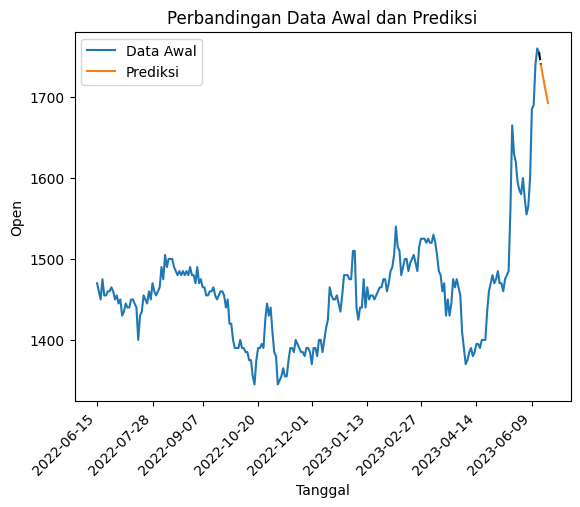

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot data df
plt.plot(df['Date'], df['Open'], label='Data Awal')

# Plot data df_pred
plt.plot(df_pred['Date'], df_pred['Open'], label='Prediksi')

# Menghubungkan plot terakhir data awal dengan plot awal data prediksi
last_Date = df['Date'].iloc[-1]
plt.plot([last_Date, df_pred['Date'].iloc[0]], [df['Open'].iloc[-1], df_pred['Open'].iloc[0]], 'k--')

# Konfigurasi plot
plt.xlabel('Tanggal')
plt.ylabel('Open')
plt.title('Perbandingan Data Awal dan Prediksi')
plt.legend()


plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Tampilkan plot
plt.show()